In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

def normalise(df):
    #https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/
    scaler = MinMaxScaler()
    numeric = ['Open','High','Low', 'Close', 'Volume']
    df[numeric] = scaler.fit_transform(df[numeric])

    return df


def preprocessData(file):
    df = pd.read_csv(file)
    df.dropna(inplace=True)
    df = normalise(df)
    mavg_data = df.rolling(window=25).mean()
    mavg_data = mavg_data[25 : ]
    X = mavg_data.drop(labels = ['Close', 'Volume', 'Adj Close'], axis=1)
    y = mavg_data['Close']
    return X, y

def preprocessDataTest(file):
    df = pd.read_csv(file)
    df.dropna(inplace=True)
    df = normalise(df)
    #mavg_data = df.rolling(window=25).mean()
    #mavg_data = mavg_data[25 : ]
    mavg_data = df
    X = mavg_data.drop(labels = ['Date','Close', 'Volume', 'Adj Close'], axis=1)
    y = mavg_data['Close']
    return X, y

def preprocessDataFor6Days(file) : 
    df = pd.read_csv(file)
    df.dropna(inplace=True)
    df_processed = pd.DataFrame(columns=['Date', 'Change'])
    df_processed['Date'] = df['Date']
    df_processed.head()
    for i in range(len(df)):
        df_processed.loc[i,'Change'] = df.loc[i,'High']-df.loc[i,'Open']
    
    X = pd.DataFrame(columns=[ 'Change_1', 'Change_2', 'Change_3', 'Change_4', 'Change_5', 'Change_6' ])
    y = pd.DataFrame(columns=['Close'])

    for i in range(len(df)-6):
        for j in range(1,7):
            X.loc[i,str('Change_'+str(j))] = df_processed.loc[i+j-1,'Change' ]
   
        y.loc[i, 'Close'] = df_processed.loc[i+6,'Change' ]

    return X, y

###SVM

For : AMZN.csv
r2 score: 
0.8289169420026412
Root Mean Squared Error: 
0.006803365375187265


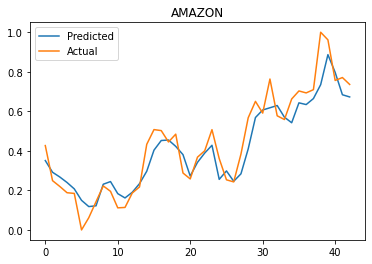

--------------------------------------------------

For : COKE.csv
r2 score: 
0.8733856407274228
Root Mean Squared Error: 
0.007101541175804167


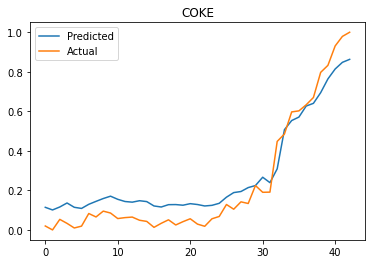

--------------------------------------------------

For : TCS.BO.csv
r2 score: 
0.8487832297388789
Root Mean Squared Error: 
0.010218987540377963


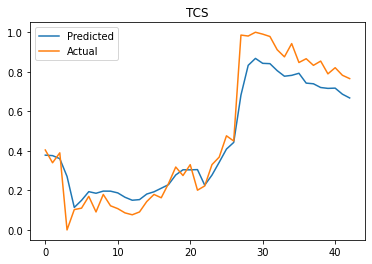

--------------------------------------------------

For : THOMASCOOK.NS.csv
r2 score: 
0.7083282666792212
Root Mean Squared Error: 
0.012731779032267918


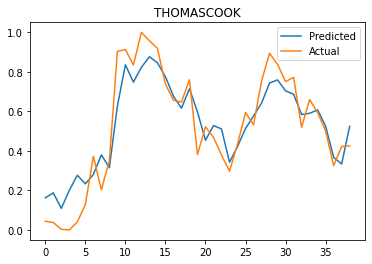

--------------------------------------------------

For : TSLA.csv
r2 score: 
0.8987856771408912
Root Mean Squared Error: 
0.007448125317000969


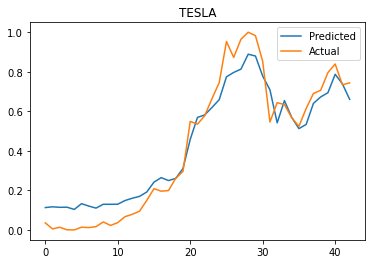

--------------------------------------------------



In [22]:
from sklearn.svm import SVR
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Company_names = ['AMAZON', 'COKE', 'TCS', 'THOMASCOOK', 'TESLA']
Train_companies_data = ['AMZN.csv', 'COKE.csv', 'TCS.BO.csv', 'THOMASCOOK.NS.csv', 'TSLA.csv']
Test_companies_data = ['AMZN_test.csv', 'COKE_test.csv', 'TCS_test.csv', 'THOMASCOOK.BO_test.csv', 'TSLA_test.csv']
i = 0
for train_name, test_name in zip(Train_companies_data, Test_companies_data, ):
  print('For :', train_name)
  X_train,y_train = preprocessData(train_name)
  regressor = SVR(kernel= 'rbf', C= 1e4, gamma= 0.1)
  regressor.fit(X_train, y_train)

  X_test, y_test = preprocessDataTest(test_name)
  predict = regressor.predict(X_test)

  plt.plot(predict, label="Predicted")

  y_pred = regressor.predict(X_train)
  print("r2 score: ")
  r2 = r2_score(predict, y_test)
  print(r2)
  print("Root Mean Squared Error: ")
  rmse = mean_squared_error(predict, y_test, squared=True)
  print(rmse)

  y_test = y_test.reset_index(drop=True)
  plt.title(Company_names[i])
  plt.plot(y_test, label="Actual")
  plt.legend()
  plt.show()
  i += 1
 
  # print("F1 score : ", f1_score)
  print("--------------------------------------------------")
  print()

###SGD

For : AMZN.csv
r2 score: 
0.8874222344257267
Root Mean Squared Error: 
0.0069068428510210824


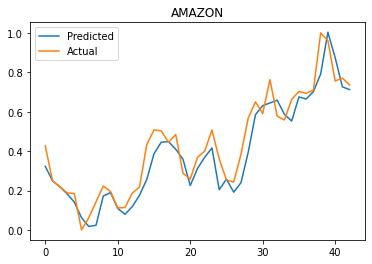

--------------------------------------------------
For : COKE.csv
r2 score: 
0.9879672112731426
Root Mean Squared Error: 
0.001107607428403356


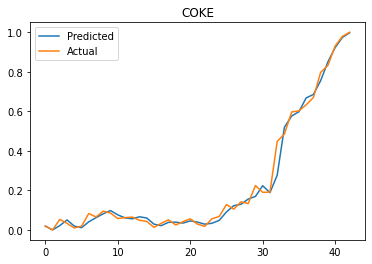

--------------------------------------------------
For : TCS.BO.csv
r2 score: 
0.950005855236272
Root Mean Squared Error: 
0.0052232365727995465


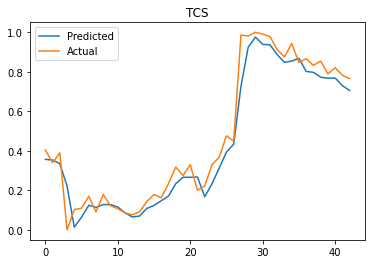

--------------------------------------------------
For : THOMASCOOK.NS.csv
r2 score: 
0.8700381759695613
Root Mean Squared Error: 
0.008910694934031219


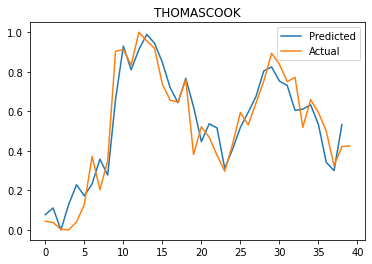

--------------------------------------------------
For : TSLA.csv
r2 score: 
0.9762125203502265
Root Mean Squared Error: 
0.0026589452690264355


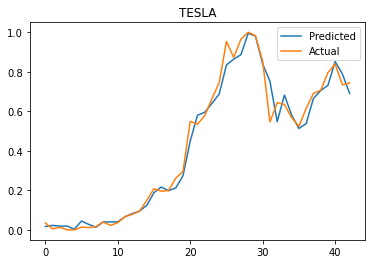

--------------------------------------------------


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Train_companies_data = ['AMZN.csv', 'COKE.csv', 'TCS.BO.csv', 'THOMASCOOK.NS.csv', 'TSLA.csv']
Test_companies_data = ['AMZN_test.csv', 'COKE_test.csv', 'TCS_test.csv', 'THOMASCOOK.BO_test.csv', 'TSLA_test.csv']
Company_names = ['AMAZON', 'COKE', 'TCS', 'THOMASCOOK', 'TESLA']
i = 0
for train_name, test_name in zip(Train_companies_data, Test_companies_data):
  print('For :', train_name)
  regressor = SGDRegressor(fit_intercept=False)

  X_train,y_train = preprocessData(train_name)
  regressor.fit(X_train, y_train)

  X_test, y_test = preprocessDataTest(test_name)
  predict = regressor.predict(X_test)

  print("r2 score: ")
  r2 = r2_score(predict, y_test)
  print(r2)
  print("Root Mean Squared Error: ")
  rmse = mean_squared_error(predict, y_test, squared=True)
  print(rmse)

  plt.plot(predict, label="Predicted")

  # y_test = y_test.reset_index(drop=True)
  plt.title(Company_names[i])
  i += 1
  plt.plot(y_test, label="Actual")
  plt.legend()
  plt.show()
  print("--------------------------------------------------")